Set up the environment.

In [1]:
import numpy as np
import pandas as pd
import pandas.io.data as web
import datetime as dt

import matplotlib.pylab as plt
import seaborn as sns

sns.set_context('talk')
pd.set_option('float_format', '{:6.2f}'.format)

%matplotlib inline

Load data from Yahoo! Finance. Load only close prices of a few companies.

For more details on Pandas remote data access read http://pandas.pydata.org/pandas-docs/version/0.16.2/remote_data.html.

In [2]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2015, 10, 1)

tickers = {'Tesla': 'TSLA', 'Ford': 'F', 'Oil ETF': 'UGA'}
prices = []

for company, tic in tickers.items():
    df = web.DataReader(tic, 'yahoo', start=start, end=end)[['Close']]
    df.rename(columns={'Close': company}, inplace=True)
    prices.append(df)

prices = pd.concat(prices, axis=1)

print(prices.head())

            Tesla  Oil ETF   Ford
Date                             
2010-01-04    nan    37.47  10.28
2010-01-05    nan    37.81  10.96
2010-01-06    nan    37.90  11.37
2010-01-07    nan    37.89  11.66
2010-01-08    nan    38.38  11.69


Print descriptive statistics.

In [3]:
print(prices.describe())

        Tesla  Oil ETF    Ford
count 1325.00  1447.00 1447.00
mean   108.69    48.71   13.87
std     92.75     9.98    2.38
min     15.80    28.53    8.92
25%     28.33    38.40   11.79
50%     37.40    50.36   14.11
75%    205.82    57.30   15.84
max    286.04    65.71   18.79


Save the data to Excel.

For more details on data IO with Pandas read http://pandas.pydata.org/pandas-docs/version/0.16.2/io.html.

In [4]:
prices.to_excel('../data/Stocks/stocks1.xlsx',
                sheet_name='Stock prices',
                na_rep='-999', float_format='%.2f')

Save data to separate sheets in the same Excel file.

In [5]:
writer = pd.ExcelWriter('../data/Stocks/stocks2.xlsx')
prices[['Ford', 'Tesla']].to_excel(writer, sheet_name='Auto')
prices[['Oil ETF']].to_excel(writer, sheet_name='Oil')
writer.save()

Save data to HDF file. This is convenient for further analysis in Pandas.

In [6]:
fname = '../data/Stocks/stocks.hdf'
key = 'all_prices'
prices.to_hdf(fname, key=key)
prices[['Oil ETF']].to_hdf(fname, key='Oil')
prices.ix[:100, ['Ford', 'Tesla']].to_hdf(fname, key='Auto', format='t')
prices.ix[100:, ['Ford', 'Tesla']].to_hdf(fname, key='Auto', append=True)

loaded = pd.read_hdf(fname, key=key)
auto = pd.read_hdf(fname, key='Auto')

print(loaded.head())
print(prices.shape, auto.shape)

            Tesla  Oil ETF   Ford
Date                             
2010-01-04    nan    37.47  10.28
2010-01-05    nan    37.81  10.96
2010-01-06    nan    37.90  11.37
2010-01-07    nan    37.89  11.66
2010-01-08    nan    38.38  11.69
(1447, 3) (1447, 2)


Save descriptive statistics as HTML file.

In [7]:
df = prices.describe()
df.to_html('../data/Stocks/stocks_summary.html')

Convert DataFrame to string with specified format.

In [8]:
df = prices.describe()
df = df.to_string(float_format=lambda x: '%.1f' % x, col_space=15, justify='right')
print(df)

                          Tesla         Oil ETF            Ford
count                    1325.0          1447.0          1447.0
mean                      108.7            48.7            13.9
std                        92.8            10.0             2.4
min                        15.8            28.5             8.9
25%                        28.3            38.4            11.8
50%                        37.4            50.4            14.1
75%                       205.8            57.3            15.8
max                       286.0            65.7            18.8


Save DataFrame as LaTeX table.

In [9]:
df = prices.describe()
df.to_latex('../data/Stocks/stocks_summary.tex', float_format=lambda x: '%.1f' % x)

Draw all prices on the same plot.

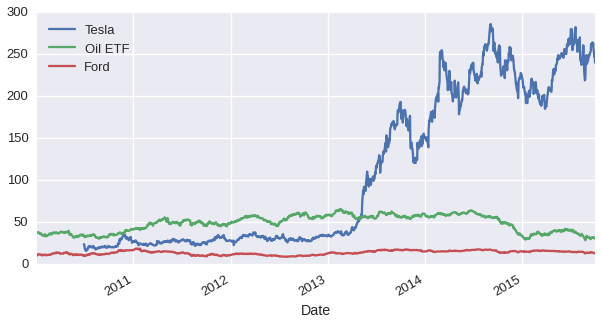

In [10]:
prices.plot(figsize=(10, 5))
plt.show()

Compute Exponentially Weighted Moving Average.

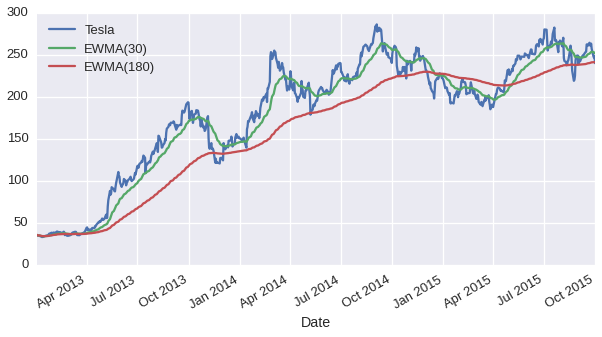

In [11]:
company = 'Tesla'
ewma = prices.ix['2013':, [company]]
for span in [30, 180]:
    ewma['EWMA(' + str(span) + ')'] = pd.ewma(ewma[company], span=span)
ewma.plot(figsize=(10, 5))
plt.show()

Draw them on subplots.

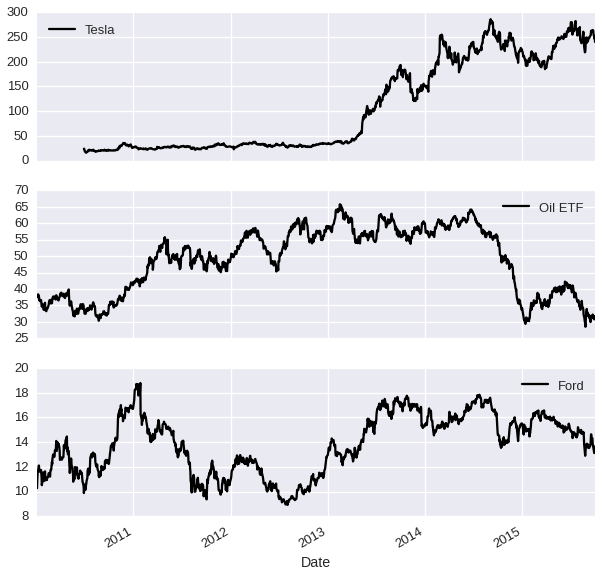

In [12]:
prices.plot(figsize=(10, 10), subplots=True)
plt.show()

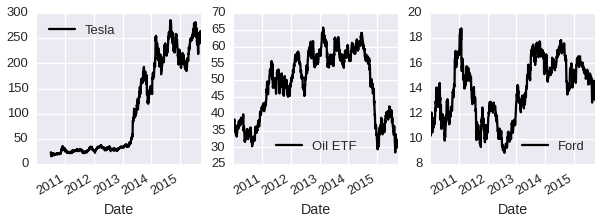

In [13]:
prices.plot(figsize=(10, 3), layout=(1, 3), subplots=True)
plt.show()

Change styling temporarily and add the second Y-axis to the plot.

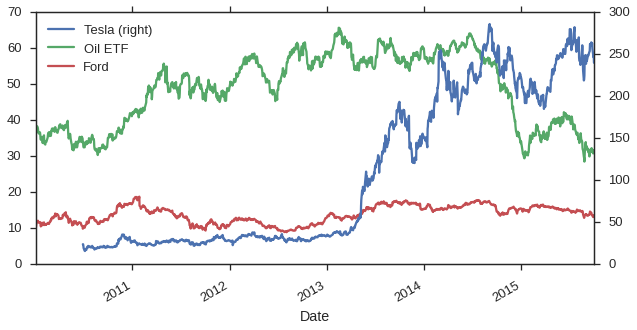

In [14]:
with sns.axes_style('white'):
    sns.set_style('ticks')
    prices.plot(figsize=(10, 5), secondary_y=['Tesla'])
    plt.show()

Compute daily percentage log-returns.

In [15]:
returns = prices.apply(lambda x: 100 * np.log(x / x.shift())).dropna()
print(returns.describe())

        Tesla  Oil ETF    Ford
count 1324.00  1324.00 1324.00
mean     0.17    -0.00    0.02
std      3.47     1.70    1.77
min    -21.48    -7.56  -14.40
25%     -1.54    -0.97   -0.91
50%      0.10     0.00    0.00
75%      1.91     1.01    0.99
max     21.83     6.39    9.41


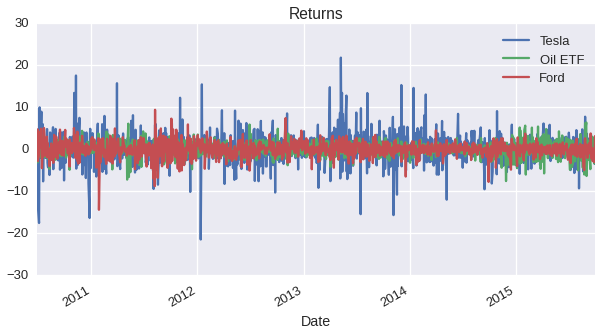

In [16]:
returns.plot(figsize=(10, 5), title='Returns')
plt.show()

Plot distribution of daily returns.

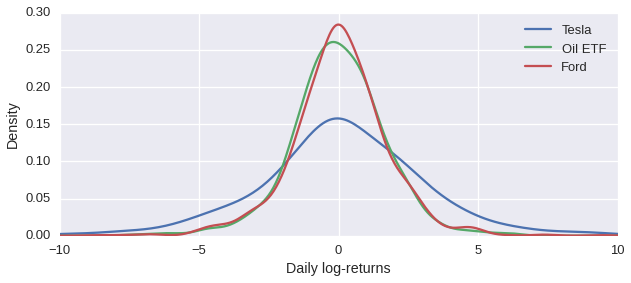

In [17]:
returns.plot(kind='kde', figsize=(10, 4))
plt.xlim([-10, 10])
plt.xlabel('Daily log-returns')
plt.show()

Merge returns and prices.

In [18]:
data = pd.merge(prices, returns, how='outer',
                left_index=True, right_index=True,
                suffixes=[' (price)', ' (return)'])
print(data.shape)
print(data.head())

(1447, 6)
            Tesla (price)  Oil ETF (price)  Ford (price)  Tesla (return)  \
Date                                                                       
2010-01-04            nan            37.47         10.28             nan   
2010-01-05            nan            37.81         10.96             nan   
2010-01-06            nan            37.90         11.37             nan   
2010-01-07            nan            37.89         11.66             nan   
2010-01-08            nan            38.38         11.69             nan   

            Oil ETF (return)  Ford (return)  
Date                                         
2010-01-04               nan            nan  
2010-01-05               nan            nan  
2010-01-06               nan            nan  
2010-01-07               nan            nan  
2010-01-08               nan            nan  


Compute cumulative return for each stock.

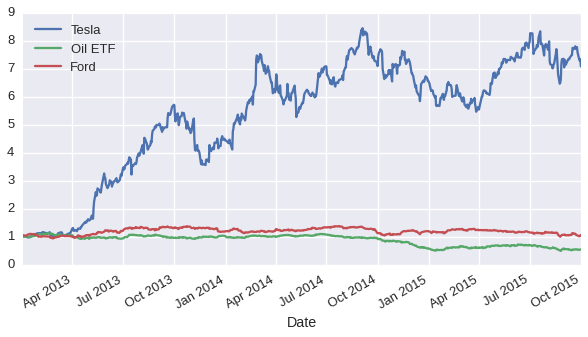

In [19]:
cumret = returns.ix['2013':].cumsum().apply(lambda x: np.exp(x / 100))
cumret.plot(figsize=(10, 5))
plt.show()

Compute risk-adjusted cumulative return for each company.

        Tesla  Oil ETF    Ford
count 1324.00  1324.00 1324.00
mean     0.05    -0.00    0.01
std      1.00     1.00    1.00
min     -6.20    -4.46   -8.14
25%     -0.44    -0.57   -0.52
50%      0.03     0.00    0.00
75%      0.55     0.59    0.56
max      6.30     3.77    5.32


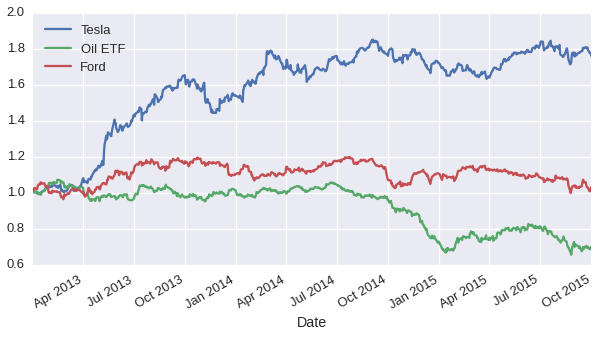

In [20]:
risk_adj = returns.apply(lambda x: x / x.std())
print(risk_adj.describe())

cumret = risk_adj.ix['2013':].cumsum().apply(lambda x: np.exp(x / 100))
cumret.plot(figsize=(10, 5))
plt.show()

Compute average returns by month for each company.

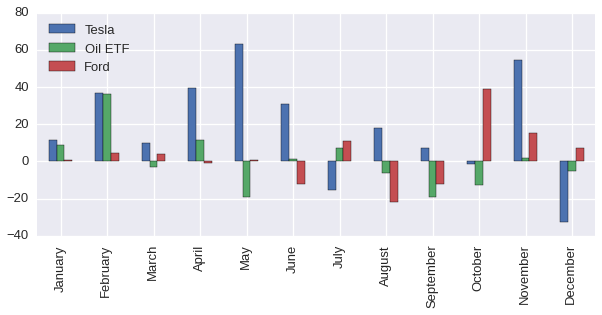

In [21]:
import calendar

ret_month = returns.copy()
ret_month = ret_month.groupby(lambda x: x.month).mean() * 100

plot = ret_month.plot(kind='bar', figsize=(10, 4))
ticks = [calendar.month_name[int(item.get_text())] for item in plot.get_xticklabels()]
plt.gca().set_xticklabels(ticks)
plt.show()

Compute annual returns for each company.

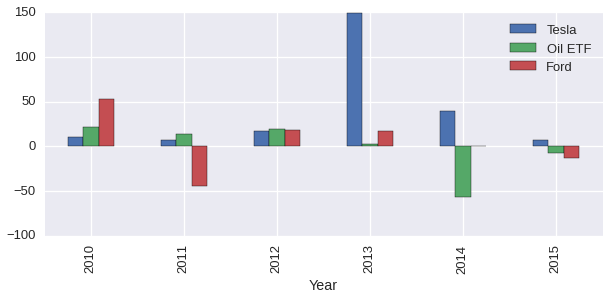

In [22]:
monthly = returns.resample('a', how='sum')
monthly['Year'] = monthly.index.year
monthly.reset_index(inplace=True, drop=True)
monthly.set_index('Year', inplace=True)

monthly.plot(kind='bar', figsize=(10, 4))
plt.show()

Plot univariate densities, bivariate densities, scatters, and regression lines for all daily stock returns.

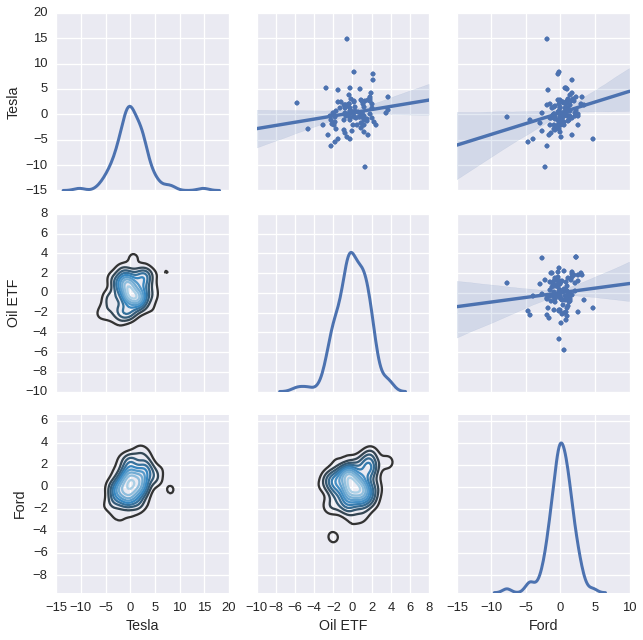

In [23]:
g = sns.PairGrid(returns.sample(100), size=3)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False)
g.map_upper(sns.regplot)
plt.show()

Plot prices, returns, and cumulative returns on the same plot. Save the figure.

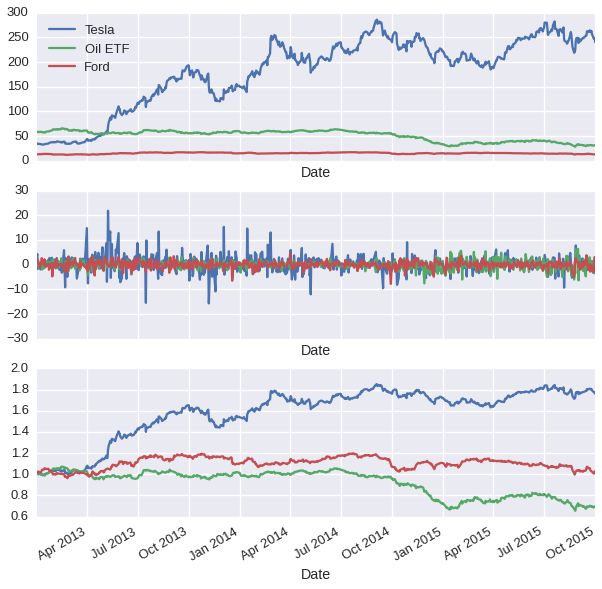

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True)
prices.plot(ax=axes[0])
returns.plot(ax=axes[1])
cumret.plot(ax=axes[2])
axes[1].legend().set_visible(False)
axes[2].legend().set_visible(False)
plt.savefig('../plots/stocks.pdf')
plt.savefig('../plots/stocks.eps')
plt.show()